In [163]:
from time import time
start_time = time()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import sys
from prettytable import PrettyTable

In [119]:
num_days = 7
num_months = 12
num_time_range = 6
num_n_d = 78

In [120]:
def show_details(df,f):
    if(f==0):
        print(df.index)
        print(len(df.columns))
        print(df.columns)
        print(df.head(5))
    else:
        print(df)
        print(len(df))
    h = 0

In [121]:
def graph_a(f):
    if(f==1):
        plt.ylabel('Percentage')
    plt.grid(True)
    plt.show()
    
def graph_b(array):
    plt.stem(array)
    graph_a(0)
#     print(array)

In [122]:
# Formatting date time string to segregate individual values
def convert(x):
    y = ""
    f = 0
    for j in range(len(x)):
        if(x[j]==' ' or x[j]==':'):
            if(x[j+1]=='A' or x[j+1]=='P'):
                if(x[j+1]=='A'):
                    f=1
                break
            else:
                y= y + '/'      
        else:
            y = y + x[j]
    month, day, year , hour , minutes , seconds = (int(t) for t in y.split('/')) 
    return month, day, year , hour , minutes , seconds , f

In [123]:
# Mapping hour range to its corresponding type for Denver
def conversion(hour,f):
    if(f==1):
        if(hour>=1 and hour<=4):
            return 1
        elif(hour>=5 and hour<=8):
            return 2 
        elif(hour>=9 and hour<=11):
            return 3
        else:
            return 6
    else:
        if(hour==12):
            return 3
        elif(hour>=1 and hour<=4):
            return 4
        elif(hour>=5 and hour<=8):
            return 5
        else:
            return 6

In [124]:
# Mapping hour range to its corresponding type for Los Angeles
def conv(x):
    if(x>=1 and x<=4):
        return 1
    elif(x>=5 and x<=8):
        return 2
    elif(x>=9 and x<=12):
        return 3
    elif(x>=13 and x<=16):
        return 4
    elif(x>=17 and x<=20):
        return 5
    return 6

In [125]:
# Finding percentage of what total value is existing
def percentage(a):
    total = 0
    for i in range(len(a)):
        total = total + a[i]
    a = [round((x*100/total),2) for x in a]
    return a

In [126]:
# Finding top three values and bottom three values in an array
def find_three(a,f):
    b = a
    ans = []
    ind = []
    for i in range(3):
        maxi = b[0]
        index =  0
        for j in range(1,len(b)):
            if(f==0):
                if(b[j] > maxi):
                    maxi = b[j]
                    index = j
            else:
                if(b[j] < maxi and b[j]!=-1):
                    maxi = b[j]
                    index = j
        b[index] = -1
        ans.append(maxi)
        ind.append(index)
    for i in range(len(ind)):
        b[ind[i]] = ans[i]
    return ans,ind

In [127]:
def type_graph(day_type,b,c):
    day_type = np.transpose(find_type_prob(day_type,b) * 100)
    bar_width = 0.75 
    plt.bar((np.arange(len(day_type[0]))*7),day_type[0],bar_width,color='blue',label='Assault')
    plt.bar(((np.arange(len(day_type[1]))*7)+1),day_type[1],bar_width,color='red',label='Drug Alcohol')
    plt.bar(((np.arange(len(day_type[2]))*7)+2),day_type[2],bar_width,color='green',label='Other Crime')
    plt.bar(((np.arange(len(day_type[3]))*7)+3),day_type[3],bar_width,color='black',label='Public Disorder')
    plt.bar(((np.arange(len(day_type[4]))*7)+4),day_type[4],bar_width,color='yellow',label='Theft')
    plt.bar(((np.arange(len(day_type[5]))*7)+5),day_type[5],bar_width,color='brown',label='White Collar Crime')
    plt.xticks(np.arange(len(day_type[0]))*7,c, fontsize=10, rotation=30)
    plt.legend(loc = 'lower right')
    graph_a(1)

In [128]:
def count(a,b):
    t = np.zeros(b)
    for i in range(len(a)):
        t[a[i]-1] = t[a[i]-1] + 1
    return t

In [129]:
# Loading Denver Dataset
data = pd.read_csv('denver.csv')
show_details(data,0)

RangeIndex(start=0, stop=490038, step=1)
19
Index(['INCIDENT_ID', 'OFFENSE_ID', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION',
       'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'FIRST_OCCURRENCE_DATE',
       'LAST_OCCURRENCE_DATE', 'REPORTED_DATE', 'INCIDENT_ADDRESS', 'GEO_X',
       'GEO_Y', 'GEO_LON', 'GEO_LAT', 'DISTRICT_ID', 'PRECINCT_ID',
       'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC'],
      dtype='object')
   INCIDENT_ID         OFFENSE_ID  OFFENSE_CODE  OFFENSE_CODE_EXTENSION  \
0   2016376978   2016376978521300          5213                       0   
1  20186000994  20186000994239900          2399                       0   
2  20166003953  20166003953230500          2305                       0   
3    201872333    201872333239900          2399                       0   
4   2017411405   2017411405230300          2303                       0   

                OFFENSE_TYPE_ID       OFFENSE_CATEGORY_ID  \
0  weapon-unlawful-discharge-of          all-other-crimes   
1          

In [130]:
# To know what unique crime types are present in dataset
crime_categories = pd.unique(data[data.columns[5]].values.ravel()).tolist()
crime_categories = set(crime_categories)
show_details(crime_categories,1)

{'traffic-accident', 'larceny', 'public-disorder', 'burglary', 'other-crimes-against-persons', 'robbery', 'sexual-assault', 'theft-from-motor-vehicle', 'white-collar-crime', 'all-other-crimes', 'auto-theft', 'arson', 'murder', 'drug-alcohol', 'aggravated-assault'}
15


In [131]:
data_d = data[[data.columns[0], data.columns[5], data.columns[6], data.columns[len(data.columns)-1-2], data.columns[len(data.columns)-1-1]] ]
# Taking into consideration only those columns that have crime involved and not an accident
data_d = data_d[(data_d[data_d.columns[4]] != 0)]
# Showing details of dataframe created
show_details(data_d,0)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 9,     10,
            ...
            490020, 490023, 490024, 490027, 490031, 490032, 490033, 490034,
            490035, 490037],
           dtype='int64', length=362315)
5
Index(['INCIDENT_ID', 'OFFENSE_CATEGORY_ID', 'FIRST_OCCURRENCE_DATE',
       'NEIGHBORHOOD_ID', 'IS_CRIME'],
      dtype='object')
   INCIDENT_ID       OFFENSE_CATEGORY_ID   FIRST_OCCURRENCE_DATE  \
0   2016376978          all-other-crimes   6/15/2016 11:31:00 PM   
1  20186000994                   larceny  10/11/2017 12:30:00 PM   
2  20166003953  theft-from-motor-vehicle     3/4/2016 8:00:00 PM   
3    201872333                   larceny    1/30/2018 7:20:00 PM   
4   2017411405                   larceny    6/22/2017 8:53:00 PM   

              NEIGHBORHOOD_ID  IS_CRIME  
0                   montbello         1  
1  gateway-green-valley-ranch         1  
2                   wellshire         1  
3                     be

In [132]:
# Function to classify crimes into respective categories
def func(s):
    s = s.lower()
    if(s=='assault' or s=='murder'):
        return 1
    if(s=='drug' or s=='alcohol' or s=='drugs' or s=='drunk' or s=='roll'):
        return 2
    if(s=='other'):
        return 3
    if(s=='pimping' or s=='initmate' or s=='public' or s=='disorder' or s=='sexual' or s=='indecent' or s=='bigamy' or s=='lewd' or s=='sex' or s=='pandering'):
        return 4
    if(s=='purse' or s=='prowlwer' or s=='pickpocket' or s=='till' or s=='theft' or s=='shoplifting' or s=='burglary' or s=='larceny' or s=='robbery' or s=='stolen'):
        return 5
    if(s=='counterfeit' or s=='identity' or s=='bunco' or s=='white' or s=='collar' or s=='embezzlement' or s=='credit' or s=='extortion' or s=='bribery' or s=='employee'):
        return 6
    return 3

# Iterating through crime type name to find crime category
def transform(s):
    x = ""
    s = str(s)
    s = s.lower()
    if(s=="theft of identity"):
        return 6
    elif(s=="other assault"):
        return 1
    for i in range(len(s)):
        if(s[i]==' ' or s[i]=='(' or s[i]=='-' or s[i]=='/' or s[i]==','):
            t = func(x)
            if(t!=3):
                return t
            else:
                x = ""
        else:
            x = x + s[i]
    return func(x)

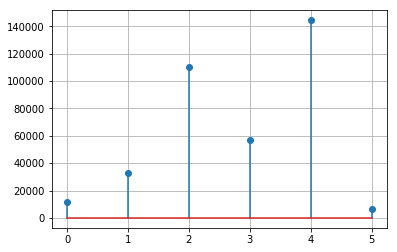

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 9,     10,
            ...
            490020, 490023, 490024, 490027, 490031, 490032, 490033, 490034,
            490035, 490037],
           dtype='int64', length=362315)
5
Index(['INCIDENT_ID', 'FIRST_OCCURRENCE_DATE', 'NEIGHBORHOOD_ID', 'IS_CRIME',
       'Crime_Type'],
      dtype='object')
   INCIDENT_ID   FIRST_OCCURRENCE_DATE             NEIGHBORHOOD_ID  IS_CRIME  \
0   2016376978   6/15/2016 11:31:00 PM                   montbello         1   
1  20186000994  10/11/2017 12:30:00 PM  gateway-green-valley-ranch         1   
2  20166003953     3/4/2016 8:00:00 PM                   wellshire         1   
3    201872333    1/30/2018 7:20:00 PM                     belcaro         1   
4   2017411405    6/22/2017 8:53:00 PM                cherry-creek         1   

  Crime_Type  
0          3  
1          5  
2          5  
3          5  
4          5  


In [133]:
all_crimes = data_d[data_d.columns[1]].values
c_count_d = np.zeros(6)
for i in range(len(all_crimes)):
    # Mappping crime type to a numerical representation
    all_crimes[i] = transform(all_crimes[i])
    # Counting the total number of that crime_type present in data
    c_count_d[all_crimes[i]-1] = c_count_d[all_crimes[i]-1] + 1
graph_b(c_count_d)
data_d['Crime_Type'] = all_crimes
data_d = data_d.drop([data_d.columns[1]], axis=1)
# Showing graph corresponding to teh count of every crime type in Denver dataset
show_details(data_d,0)

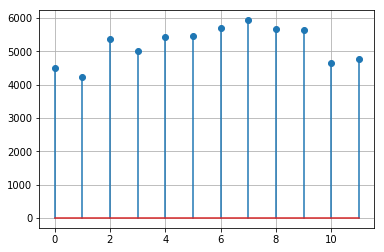

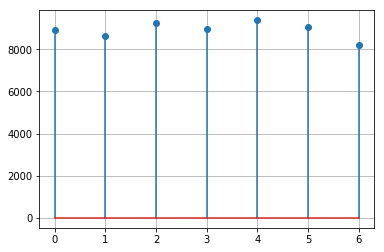

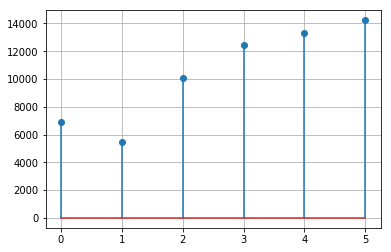

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 9,     10,
            ...
            490020, 490023, 490024, 490027, 490031, 490032, 490033, 490034,
            490035, 490037],
           dtype='int64', length=362315)
8
Index(['INCIDENT_ID', 'NEIGHBORHOOD_ID', 'IS_CRIME', 'Crime_Type',
       'Crime_Month', 'Crime_Day', 'Crime_Time', 'Crime_Year'],
      dtype='object')
   INCIDENT_ID             NEIGHBORHOOD_ID  IS_CRIME Crime_Type  Crime_Month  \
0   2016376978                   montbello         1          3            6   
1  20186000994  gateway-green-valley-ranch         1          5           10   
2  20166003953                   wellshire         1          5            3   
3    201872333                     belcaro         1          5            1   
4   2017411405                cherry-creek         1          5            6   

   Crime_Day  Crime_Time  Crime_Year  
0          3           6        2016  
1          3        

,INCIDENT_ID,NEIGHBORHOOD_ID,IS_CRIME,Crime_Type,Crime_Month,Crime_Day,Crime_Time,Crime_Year
0,2016376978,montbello,1,3,6,3,6,2016
1,20186000994,gateway-green-valley-ranch,1,5,10,3,3,2017
2,20166003953,wellshire,1,5,3,5,5,2016
3,201872333,belcaro,1,5,1,2,5,2018
4,2017411405,cherry-creek,1,5,6,4,5,2017


In [134]:
# Finding month, hour, day count in dataset for dataset to analyze what is unsafe time period for staying out
months = []
days = []
hours = []
years_d = []
d_count_d = np.zeros(num_days)
m_count_d = np.zeros(num_months)
h_count_d = np.zeros(num_time_range)
date = data_d[data_d.columns[1]].values
for i in range(len(date)):
    x = date[i]
    x = str(x)
    month, day, year , hour , minutes , seconds , f = convert(x)  
    years_d.append(year)
    ans = datetime.date(year, month, day)
    months.append(month)
    t = ans.weekday()
    days.append(t+1)
    j = conversion(hour,f)
    hours.append(j)
    if(year==2014):
        m_count_d[month-1] = m_count_d[month-1]+1
        d_count_d[t] = d_count_d[t]+1
        h_count_d[j-1] = h_count_d[j-1] + 1
graph_b(m_count_d)
graph_b(d_count_d)
graph_b(h_count_d)
data_d['Crime_Month'] = months
data_d['Crime_Day'] = days
data_d['Crime_Time'] = hours
data_d['Crime_Year'] = years_d
data_d = data_d.drop([data_d.columns[1]], axis=1)
show_details(data_d,0)
data_d.head()

In [135]:
# Loading Demographics Dataset which includes information about neighbourhood areas of denver
demographics = pd.read_csv('demographic.csv')
show_details(demographics,0)

RangeIndex(start=0, stop=78, step=1)
127
Index(['NBHD_ID', 'NBRHD_NAME', 'POPULATION_2010', 'HISPANIC_2010',
       'WHITE_2010', 'BLACK_2010', 'NATIVEAM_2010', 'ASIAN_2010',
       'HAWPACIS_2010', 'OTHER_2010',
       ...
       'RENTED_AGE_25_TO_34', 'RENTED_AGE_35_TO_44', 'RENTED_AGE_45_TO_54',
       'RENTED_AGE_55_TO_59', 'RENTED_AGE_60_TO_64', 'RENTED_AGE_65_TO_74',
       'RENTED_AGE_75_TO_84', 'RENTED_AGE_85_PLUS', 'SHAPE_Length',
       'SHAPE_Area'],
      dtype='object', length=127)
   NBHD_ID       NBRHD_NAME  POPULATION_2010  HISPANIC_2010  WHITE_2010  \
0       32          Hampden          17547.0         2505.0     11750.0   
1        3            Baker           4879.0         1664.0      2854.0   
2       70  Washington Park           6905.0          295.0      6356.0   
3       13     Cherry Creek           5589.0          332.0      4896.0   
4       22     Country Club           3001.0           94.0      2740.0   

   BLACK_2010  NATIVEAM_2010  ASIAN_2010  HAWPACI

In [136]:
current = demographics[[demographics.columns[0], demographics.columns[1]]]
current = current.sort_values(by=[current.columns[0]])
n_ref = current[current.columns[1]].values
for i in range(len(n_ref)):
    x = n_ref[i]
    x = str(x)
    x = x.lower()
    y = ""
    f = 1
    for j in range(len(x)):
        if(x[j]=='/' and x[j+1]==' '):
            f=0  
        elif(x[j]==' ' and f==1):
            y = y + '-'
            f = 0
        elif(x[j]==' ' and f==0):
            continue
        elif(x[j]=='-'):
            continue
        else:
            y = y + x[j]
            f = 1
    n_ref[i] = y
show_details(current,0)

Int64Index([69, 59,  1, 72, 40, 77, 60, 63,  8, 11, 70, 56,  3, 36,  7, 10,  5,
            22, 51, 21, 18,  4, 28, 34, 54, 13, 76, 39, 16, 26, 47,  0, 52, 71,
            38, 15, 57, 33, 67, 50, 58, 37, 43, 75, 74, 41,  9, 48, 53, 55, 42,
            64, 35, 24,  6, 62, 49, 32, 20, 14, 65, 23, 12, 25, 29, 17, 68, 46,
            27,  2, 19, 45, 66, 30, 31, 44, 73, 61],
           dtype='int64')
2
Index(['NBHD_ID', 'NBRHD_NAME'], dtype='object')
    NBHD_ID   NBRHD_NAME
69        1  athmar-park
59        2      auraria
1         3        baker
72        4       barnum
40        5  barnum-west


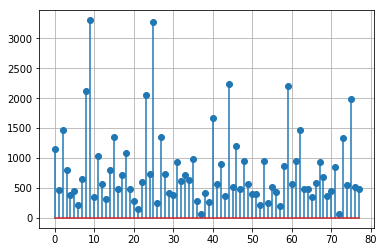

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 9,     10,
            ...
            490020, 490023, 490024, 490027, 490031, 490032, 490033, 490034,
            490035, 490037],
           dtype='int64', length=362315)
8
Index(['INCIDENT_ID', 'IS_CRIME', 'Crime_Type', 'Crime_Month', 'Crime_Day',
       'Crime_Time', 'Crime_Year', 'Crime_Location'],
      dtype='object')
   INCIDENT_ID  IS_CRIME Crime_Type  Crime_Month  Crime_Day  Crime_Time  \
0   2016376978         1          3            6          3           6   
1  20186000994         1          5           10          3           3   
2  20166003953         1          5            3          5           5   
3    201872333         1          5            1          2           5   
4   2017411405         1          5            6          4           5   

   Crime_Year  Crime_Location  
0        2016              45  
1        2017              28  
2        2016              73  
3

In [137]:
ans = []
n_count_d = np.zeros(78)
neighbours = data_d[data_d.columns[1]].values
for i in range(len(neighbours)):
    x = neighbours[i]
    x = str(x)
    for j in range(len(n_ref)):
        if(x==n_ref[j]):
            ans.append(j+1)
            if(years_d[i]==2014):
                n_count_d[j] = n_count_d[j] + 1
            break
data_d['Crime_Location'] = ans
data_d = data_d.drop(data_d.columns[1],axis=1)
graph_b(n_count_d)
show_details(data_d,0)

In [138]:
data = pd.read_csv('los_angeles.csv')
show_details(data,0)

RangeIndex(start=0, stop=1584316, step=1)
26
Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')
   DR Number Date Reported Date Occurred  Time Occurred  Area ID    Area Name  \
0    1208575    03/14/2013    03/11/2013           1800       12  77th Street   
1  102005556    01/25/2010    01/22/2010           2300       20      Olympic   
2        418    03/19/2013    03/18/2013           2030       18    Southeast   
3  101822289    11/11/2010    11/10/2010           1800       18    Southeast   
4   42104479    01/11/2014    01/04/2014        

In [139]:
data_la = data[[data.columns[0], data.columns[2], data.columns[3], data.columns[4], data.columns[8]]]
show_details(data_la,0)

RangeIndex(start=0, stop=1584316, step=1)
5
Index(['DR Number', 'Date Occurred', 'Time Occurred', 'Area ID',
       'Crime Code Description'],
      dtype='object')
   DR Number Date Occurred  Time Occurred  Area ID  \
0    1208575    03/11/2013           1800       12   
1  102005556    01/22/2010           2300       20   
2        418    03/18/2013           2030       18   
3  101822289    11/10/2010           1800       18   
4   42104479    01/04/2014           2300       21   

                     Crime Code Description  
0         INTIMATE PARTNER - SIMPLE ASSAULT  
1                          VEHICLE - STOLEN  
2                          VEHICLE - STOLEN  
3                          VEHICLE - STOLEN  
4  VANDALISM - MISDEAMEANOR ($399 OR UNDER)  


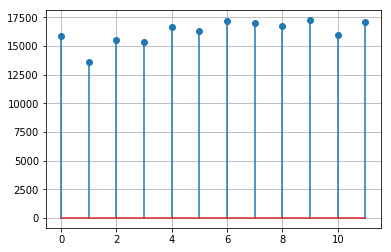

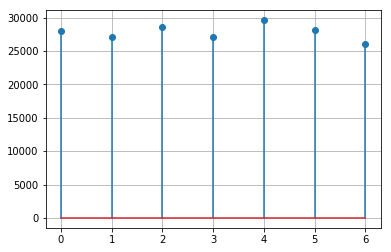

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


RangeIndex(start=0, stop=1584316, step=1)
7
Index(['DR Number', 'Time Occurred', 'Area ID', 'Crime Code Description',
       'Crime_Month', 'Crime_Day', 'Crime_Year'],
      dtype='object')
   DR Number  Time Occurred  Area ID  \
0    1208575           1800       12   
1  102005556           2300       20   
2        418           2030       18   
3  101822289           1800       18   
4   42104479           2300       21   

                     Crime Code Description  Crime_Month  Crime_Day  \
0         INTIMATE PARTNER - SIMPLE ASSAULT            3          1   
1                          VEHICLE - STOLEN            1          5   
2                          VEHICLE - STOLEN            3          1   
3                          VEHICLE - STOLEN           11          3   
4  VANDALISM - MISDEAMEANOR ($399 OR UNDER)            1          6   

   Crime_Year  
0        2013  
1        2010  
2        2013  
3        2010  
4        2014  


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [140]:
months = []
days = []
years = []
d_count_la = np.zeros(num_days)
m_count_la = np.zeros(num_months)
date = data_la[data_la.columns[1]].values
for i in range(len(date)):
    x = date[i]
    x = str(x)
    month, day, year = (int(t) for t in x.split('/'))  
    years.append(year)
    ans = datetime.date(year, month, day)
    months.append(month)
    t = ans.weekday()
    days.append(t+1)
    if(year==2014):
        m_count_la[month-1] = m_count_la[month-1]+1
        d_count_la[t] = d_count_la[t]+1
graph_b(m_count_la)
graph_b(d_count_la)
data_la['Crime_Month'] = months
data_la['Crime_Day'] = days
data_la['Crime_Year'] = years
data_la = data_la.drop([data_la.columns[1]], axis=1)
show_details(data_la,0)

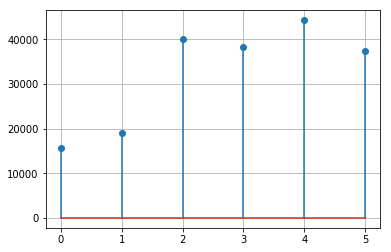

RangeIndex(start=0, stop=1584316, step=1)
7
Index(['DR Number', 'Area ID', 'Crime Code Description', 'Crime_Month',
       'Crime_Day', 'Crime_Year', 'Crime_Time'],
      dtype='object')
   DR Number  Area ID                    Crime Code Description  Crime_Month  \
0    1208575       12         INTIMATE PARTNER - SIMPLE ASSAULT            3   
1  102005556       20                          VEHICLE - STOLEN            1   
2        418       18                          VEHICLE - STOLEN            3   
3  101822289       18                          VEHICLE - STOLEN           11   
4   42104479       21  VANDALISM - MISDEAMEANOR ($399 OR UNDER)            1   

   Crime_Day  Crime_Year  Crime_Time  
0          1        2013           5  
1          5        2010           6  
2          1        2013           5  
3          3        2010           5  
4          6        2014           6  


In [141]:
hours = []
h_count_la = np.zeros(num_time_range)
times = data_la[data_la.columns[1]].values
for i in range(len(times)):
    x = times[i]
    x = int(x)
    x = int(x/100)
    t = conv(x)
    hours.append(t)
    if(years[i]==2014):
        h_count_la[t-1] = h_count_la[t-1] + 1
graph_b(h_count_la)
data_la['Crime_Time'] = hours
data_la = data_la.drop([data_la.columns[1]],axis=1)
show_details(data_la,0)

In [142]:
crime_categories = pd.unique(data[data.columns[8]].values.ravel())
crime_categories
final_cc = []
for i in range(len(crime_categories)):
    x = str(crime_categories[i])
    y = ""
    for j in range(len(x)):
        if(x[j]=='-' or x[j]=='/' or x[j]=='(' or x[j]==',' or x[j]==')'):
            y = y + ' ' 
        else:
            y = y + x[j]
    if(y[len(y)-1]==' '):
        y =y[:-1]
    final_cc.append(y)
final_cc = set(final_cc)
final_cc = [x.lower() for x in final_cc]
show_details(final_cc,1)

['criminal homicide', 'violation of restraining order', 'cruelty to animals', 'till tap   grand theft  $950.01 & over', 'till tap   attempt', 'credit cards  fraud use  $950 & under', 'intimate partner   simple assault', 'other miscellaneous crime', 'robbery', 'grand theft   auto repair', 'burglary', 'failure to yield', 'theft from person   attempt', 'pandering', 'peeping tom', 'theft from motor vehicle   grand  $400 and over', 'child abuse  physical    simple assault', 'dishonest employee   petty theft', 'pickpocket', 'bunco  grand theft', 'violation of temporary restraining order', 'extortion', 'intimate partner   aggravated assault', 'defrauding innkeeper theft of services  $400 & under', 'assault with deadly weapon  aggravated assault', 'credit cards  fraud use  $950.01 & over', 'theft  coin machine   petty  $950 & under', 'shoplifting   attempt', 'burglary from vehicle  attempted', 'discharge firearms shots fired', 'purse snatching', 'vandalism   felony  $400 & over  all church van

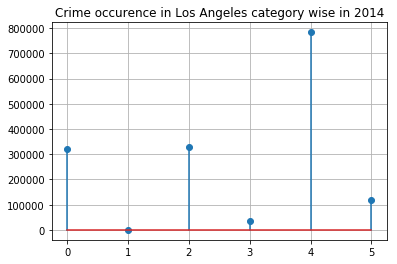

RangeIndex(start=0, stop=1584316, step=1)
7
Index(['DR Number', 'Area ID', 'Crime_Month', 'Crime_Day', 'Crime_Year',
       'Crime_Time', 'Crime_Type'],
      dtype='object')
   DR Number  Area ID  Crime_Month  Crime_Day  Crime_Year  Crime_Time  \
0    1208575       12            3          1        2013           5   
1  102005556       20            1          5        2010           6   
2        418       18            3          1        2013           5   
3  101822289       18           11          3        2010           5   
4   42104479       21            1          6        2014           6   

   Crime_Type  
0           1  
1           5  
2           5  
3           5  
4           3  


In [143]:
all_crimes = data_la[data_la.columns[2]].values
ans = []
c_count_la = np.zeros(6)
for i in range(len(all_crimes)):
    y = transform(all_crimes[i])
    ans.append(y)
    c_count_la[y-1] = c_count_la[y-1] + 1
data_la['Crime_Type'] = ans
data_la = data_la.drop(data_la.columns[2],axis=1)
plt.title('Crime occurence in Los Angeles category wise in 2014')
graph_b(c_count_la)
show_details(data_la,0)

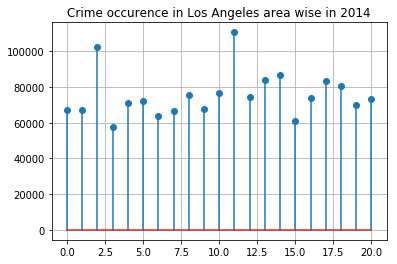

In [144]:
neigh = data_la[data_la.columns[1]].values
n_count_la = np.zeros(21)
for i in range(len(neigh)):
    n_count_la[neigh[i]-1] = n_count_la[neigh[i]-1] + 1
plt.title('Crime occurence in Los Angeles area wise in 2014')
graph_b(n_count_la)

In [145]:
n_count_d = percentage(n_count_d)
n_count_la = percentage(n_count_la)
h_count_d = percentage(h_count_d)
h_count_la = percentage(h_count_la)
d_count_d = percentage(d_count_d)
d_count_la = percentage(d_count_la)
m_count_d = percentage(m_count_d)
m_count_la = percentage(m_count_la)

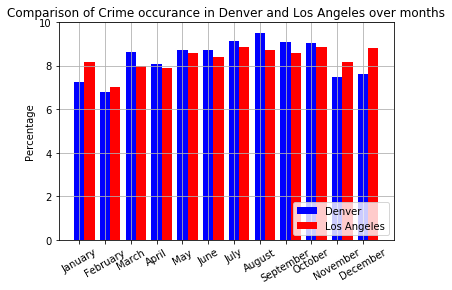

In [146]:
bar_width = 4
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.bar((np.arange(len(m_count_d))*10),m_count_d,bar_width,color='blue',label='Denver')
plt.xticks(np.arange(len(m_count_d))*10, months, fontsize=10, rotation=30)
plt.bar((np.arange(len(m_count_la))*10)+bar_width,m_count_la,bar_width,color='red',label='Los Angeles')
plt.legend(loc = 'lower right')
plt.title('Comparison of Crime occurance in Denver and Los Angeles over months')
graph_a(1)

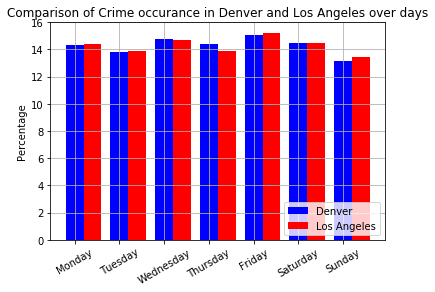

In [147]:
bar_width = 4
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.bar((np.arange(len(d_count_d))*10),d_count_d,bar_width,color='blue',label='Denver')
plt.xticks(np.arange(len(d_count_d))*10,days, fontsize=10, rotation=30)
plt.bar((np.arange(len(d_count_la))*10)+bar_width,d_count_la,bar_width,color='red',label='Los Angeles')
plt.legend(loc = 'lower right')
plt.title('Comparison of Crime occurance in Denver and Los Angeles over days')
graph_a(1)

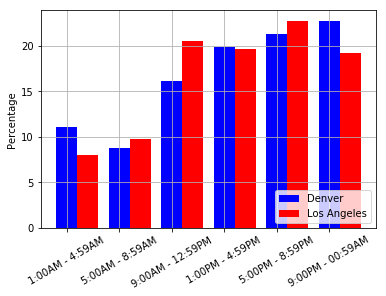

In [148]:
bar_width = 4
days = ['1:00AM - 4:59AM','5:00AM - 8:59AM','9:00AM - 12:59PM','1:00PM - 4:59PM','5:00PM - 8:59PM','9:00PM - 00:59AM']
plt.bar((np.arange(len(h_count_d))*10),h_count_d,bar_width,color='blue',label='Denver')
plt.bar(np.arange(len(h_count_la))*10+bar_width, h_count_la, bar_width, color='red' ,label='Los Angeles')
plt.xticks(np.arange(len(h_count_d))*10,days, fontsize=10, rotation=30)
plt.legend(loc = 'lower right')
graph_a(1)

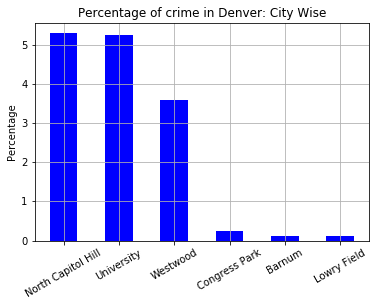

In [149]:
n_count_t , index_t = find_three(n_count_d,0)
n_count_l , index_l = find_three(n_count_d,1)
n_count_l.reverse()
index_l.reverse()
n_count_t = n_count_t + n_count_l
index_t = index_t + index_l
bar_width = 0.5
current = demographics[[demographics.columns[0], demographics.columns[1]]]
current = current.sort_values(by=[current.columns[0]])
cities = []
for i in range(len(index_t)):
    cities.append(current[current.columns[1]][index_t[i]])
plt.bar((np.arange(len(n_count_t))*1),n_count_t,bar_width,color='blue')
plt.xticks(np.arange(len(n_count_t))*1, cities, fontsize=10, rotation=30)
plt.title('Percentage of crime in Denver: City Wise')
graph_a(1)

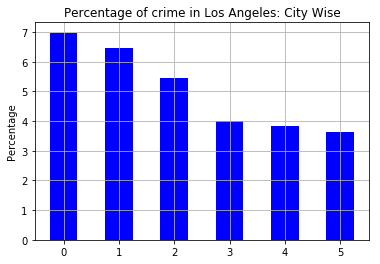

In [150]:
n_count_t , index_t = find_three(n_count_la,0)
n_count_l , index_l = find_three(n_count_la,1)
n_count_l.reverse()
index_l.reverse()
n_count_t = n_count_t + n_count_l
index_t = index_t + index_l
bar_width = 0.5
plt.bar((np.arange(len(n_count_t))*1),n_count_t,bar_width,color='blue')
plt.title('Percentage of crime in Los Angeles: City Wise')
graph_a(1)

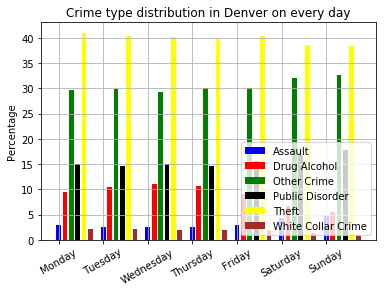

In [151]:
def find_type_prob(a,b):
    for i in range(b):
        s = 0
        for j in range(6):
            s = s + a[i][j]
        for j in range(6):
            a[i][j] = a[i][j] / s
    return a

day_d = data_d[data_d.columns[4]].values
type_d = data_d[data_d.columns[2]].values
day_type_d = np.zeros((7,6))
for i in range(len(day_d)):
    b = day_d[i] - 1
    a = type_d[i] - 1
    day_type_d[b][a] = day_type_d[b][a] + 1
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.title('Crime type distribution in Denver on every day')
type_graph(day_type_d,7,days)

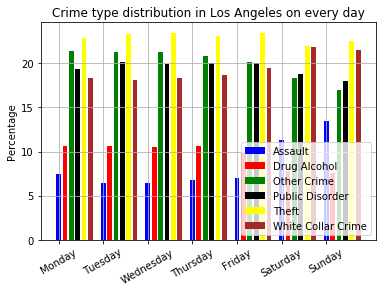

In [152]:
day_la = data_la[data_la.columns[3]].values
type_la = data_la[data_la.columns[5]].values
day_type_la = np.zeros((7,6))
for i in range(len(day_la)):
    b = day_la[i] - 1
    a = type_la[i] - 1
    day_type_la[b][a] = day_type_la[b][a] + 1
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.title('Crime type distribution in Los Angeles on every day')
type_graph(day_type_la,7,days)

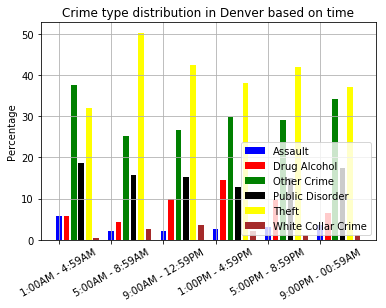

In [153]:
time_d = data_d[data_d.columns[5]].values
time_type_d = np.zeros((6,6))
for i in range(len(time_d)):
    b = time_d[i] - 1
    a = type_d[i] - 1
    time_type_d[b][a] = time_type_d[b][a] + 1    
a = ['1:00AM - 4:59AM','5:00AM - 8:59AM','9:00AM - 12:59PM','1:00PM - 4:59PM','5:00PM - 8:59PM','9:00PM - 00:59AM']
plt.title('Crime type distribution in Denver based on time')
type_graph(time_type_d,6,a)

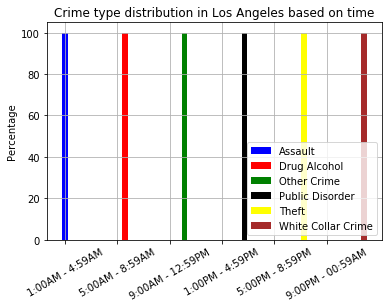

In [154]:
time_la = data_la[data_la.columns[5]].values
time_type_la = np.zeros((6,6))
for i in range(len(time_la)):
    b = time_la[i] - 1
    a = type_la[i] - 1
    time_type_la[b][a] = time_type_la[b][a] + 1    
a = ['1:00AM - 4:59AM','5:00AM - 8:59AM','9:00AM - 12:59PM','1:00PM - 4:59PM','5:00PM - 8:59PM','9:00PM - 00:59AM']
plt.title('Crime type distribution in Los Angeles based on time')
type_graph(time_type_la,6,a)

In [155]:
train_d = data_d.iloc[0:343100]
test_d = data_d.iloc[343101:]

In [158]:
train_m_d = train_d[train_d.columns[3]].values
train_n_d = train_d[train_d.columns[7]].values
train_c_d = train_d[train_d.columns[2]].values
train_d_d = train_d[train_d.columns[4]].values
train_t_d = train_d[train_d.columns[5]].values
train_y_d = train_d[train_d.columns[6]].values
test_m_d = test_d[test_d.columns[3]].values
test_n_d = test_d[test_d.columns[7]].values
test_c_d = test_d[test_d.columns[2]].values
test_d_d = test_d[test_d.columns[4]].values
test_t_d = test_d[test_d.columns[5]].values
test_y_d = test_d[test_d.columns[6]].values

for i in range(len(train_y_d)):
    t = train_y_d[i] - 2013
    train_y_d[i] = t

for i in range(len(test_y_d)):
    t = test_y_d[i] - 2013
    test_y_d[i] = t

In [159]:
def prob(a):
    s = 0
    for i in range(len(a)):
        s = s+a[i]
    for i in range(len(a)):
        a[i] = a[i]/s
    return a

prob_m_d = prob(count(train_m_d,num_months))
prob_n_d = prob(count(train_n_d,num_n_d))
prob_c_d = prob(count(train_c_d,6))
prob_d_d = prob(count(train_d_d,num_days))
prob_t_d = prob(count(train_t_d,num_time_range))
prob_y_d = prob(count(train_y_d,6))

In [160]:
def bayesian_formula(a,b,c):
    for i in range(6):
        for j in range(c):
            a[i][j] = a[i][j] * b[i]
    return a

def check_valid(a):
    if round(np.sum(a),1)==1.0:
        return True
    return False

def type_prob(a,b):
    for i in range(6):
        s = 0
        for j in range(b):
            s = s + a[i][j]
        for j in range(b):
            a[i][j] = a[i][j] / s
    return a

def find_matrix(a,b,c,d):
    t = np.zeros((d,6))
    for i in range(len(a)):
        t[a[i]-1][b[i]-1] = t[a[i]-1][b[i]-1] + 1
    t = np.transpose(t)
    t = type_prob(t,d)
    t = bayesian_formula(t,c,d)
    return t

month_type_d = find_matrix(train_m_d,train_c_d,prob_c_d,num_months)
day_type_d = find_matrix(train_d_d,train_c_d,prob_c_d,num_days)
time_type_d = find_matrix(train_t_d,train_c_d,prob_c_d,num_time_range)
n_type_d = find_matrix(train_n_d,train_c_d,prob_c_d,num_n_d)
y_type_d = find_matrix(train_y_d,train_c_d,prob_y_d,6)

In [161]:
def find_final_catogory_prob(a,b,d):
    c = []
    for i in range(len(a)):
        t = a[i]
        ans = -1
        maxi = 0
        for j in range(b):
            if(d[j][t-1]>maxi):
                maxi=d[j][t-1]
                ans = j+1
        c.append(ans)
    return c

test_m_c_d = find_final_catogory_prob(test_m_d,6,month_type_d)
test_m_d_d = find_final_catogory_prob(test_d_d,6,day_type_d)
test_m_n_d = find_final_catogory_prob(test_n_d,6,n_type_d)
test_m_t_d = find_final_catogory_prob(test_t_d,6,time_type_d)
test_m_t_d = find_final_catogory_prob(test_t_d,6,time_type_d)

In [166]:
count = np.zeros(6)
test_results = []
for i in range(len(test_m_d)):
    maxi = 0
    for j in range(6):
        k = month_type_d[j][test_m_d[i]-1]*time_type_d[j][test_t_d[i]-1]*day_type_d[j][test_d_d[i]-1]*n_type_d[j][test_n_d[i]-1]*y_type_d[j][test_y_d[i]-1]
        if(maxi<k):
            maxi = k
            ans = j+1
    test_results.append(ans)
    count[ans-1] = count[ans-1] + 1
print(count)

correct=0
for i in range(len(test_results)):
    if(test_c_d[i]==test_results[i]):
        correct = correct + 1
print(correct)
print(len(test_results))
print(correct/len(test_results))
#     one = month_type_d[test_m_d[i]-1][0]*time_type_d[test_t_d[i]-1][0]*day_type_d[test_d_d[i]-1][0]

[    0.     0.  4164.     0. 15050.     0.]
8767
19214
0.4562818777974394


In [167]:
y = np.zeros((6,6))
for i in range(len(test_c_d)):
    y[test_c_d[i]-1][test_results[i]-1] = y[test_c_d[i]-1][test_results[i]-1] + 1
print(y)

[[   0.    0.  220.    0.  450.    0.]
 [   0.    0.  440.    0. 1127.    0.]
 [   0.    0. 1823.    0. 4088.    0.]
 [   0.    0.  591.    0. 2138.    0.]
 [   0.    0. 1052.    0. 6944.    0.]
 [   0.    0.   38.    0.  303.    0.]]


In [ ]:
def calculate(true_positive,false_positive,false_negative,true_negative):
    result = {}
    result['precision'] = true_positive / (true_positive + false_positive)
    result['recall'] = true_positive / (true_positive + false_negative)
    return result

def confusion_matrix(true_positive,false_positive,false_negative,true_negative):
    matrix = PrettyTable([' ', 'Ham' , 'Spam'])
    matrix.add_row(['Ham', true_positive , false_positive])
    matrix.add_row(['Spam', false_negative , true_negative])
    return matrix , calculate(true_positive,false_positive,false_negative,true_negative)

for i in range()

In [ ]:
end_time = time()
print(round(end_time - start_time,2))

In [ ]:
# month_type_d = np.zeros((num_months,6))
# for i in range(len(train_m_d)):
#      month_type_d[train_m_d[i]-1][train_c_d[i]-1] = month_type_d[train_m_d[i]-1][train_c_d[i]-1] + 1
# month_type_d = np.transpose(month_type_d)
# month_type_d = type_prob(month_type_d,num_months)
# month_type_d = bayesian_formula(month_type_d,prob_c_d,num_months)
# print(month_type_d)

# day_type_d = np.zeros((num_days,6))
# for i in range(len(train_d_d)):
#      day_type_d[train_d_d[i]-1][train_c_d[i]-1] = day_type_d[train_d_d[i]-1][train_c_d[i]-1] + 1
# day_type_d = np.transpose(day_type_d)
# day_type_d = type_prob(day_type_d,num_days)
# day_type_d = bayesian_formula(day_type_d,prob_c_d,num_days)
# print(day_type_d)

# day_type_d = np.zeros((num_days,6))
# for i in range(len(train_d_d)):
#      day_type_d[train_d_d[i]-1][train_c_d[i]-1] = day_type_d[train_d_d[i]-1][train_c_d[i]-1] + 1
# day_type_d = np.transpose(day_type_d)
# day_type_d = type_prob(day_type_d,num_days)
# day_type_d = bayesian_formula(day_type_d,prob_c_d,num_days)
# print(day_type_d)

In [ ]:
# # Given a month what is the probability that crime committed belongs to a particular category
# month_type_d = np.zeros((12,6))
# for i in range(len(train_m_d)):
#      month_type_d[train_m_d[i]-1][train_c_d[i]-1] = month_type_d[train_m_d[i]-1][train_c_d[i]-1] + 1
# month_type_d = find_type_prob(month_type_d,12)

In [101]:
# # Given a day what is the probability that crime committed belongs to a particular category
# day_type_d = np.zeros((7,6))
# for i in range(len(train_d_d)):
#      day_type_d[train_d_d[i]-1][train_c_d[i]-1] = day_type_d[train_d_d[i]-1][train_c_d[i]-1] + 1
# day_type_d = find_type_prob(day_type_d,7)

In [102]:
# # Given a time range what is the probability that crime committed belongs to a particular category
# time_type_d = np.zeros((6,6))
# for i in range(len(train_t_d)):
#      time_type_d[train_t_d[i]-1][train_c_d[i]-1] = time_type_d[train_t_d[i]-1][train_c_d[i]-1] + 1
# time_type_d = find_type_prob(time_type_d,num_time_range)

In [168]:
# # Given an area what is the probability that crime committed belongs to a particular category
# n_type_d = np.zeros((78,6))
# for i in range(len(train_n_d)):
#      n_type_d[train_n_d[i]-1][train_c_d[i]-1] = n_type_d[train_n_d[i]-1][train_c_d[i]-1] + 1
# n_type_d = find_type_prob(n_type_d,num_n_d)

In [104]:
# # Finding probablity that of month intersection with category
# month_type_d = bayesian_formula(month_type_d,prob_m_d,num_months)

# # Finding probablity that of day intersection with category
# day_type_d = bayesian_formula(day_type_d,prob_d_d,num_days)

# # Finding probablity that of time intersection with category
# time_type_d = bayesian_formula(time_type_d,prob_t_d,num_time_range)

# # Finding probablity that of neighbourhood area intersection with category
# n_type_d = bayesian_formula(n_type_d,prob_n_d,num_n_d)

In [105]:
# print(check_valid(month_type_d))
# print(check_valid(day_type_d))
# print(check_valid(time_type_d))
# print(check_valid(n_type_d))